<a href="https://colab.research.google.com/github/FadlilaAfida/PCVK_Ganjil_2023/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

##1. Buat Gamma Correction sesuai dengan petunjuk berikut

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 5


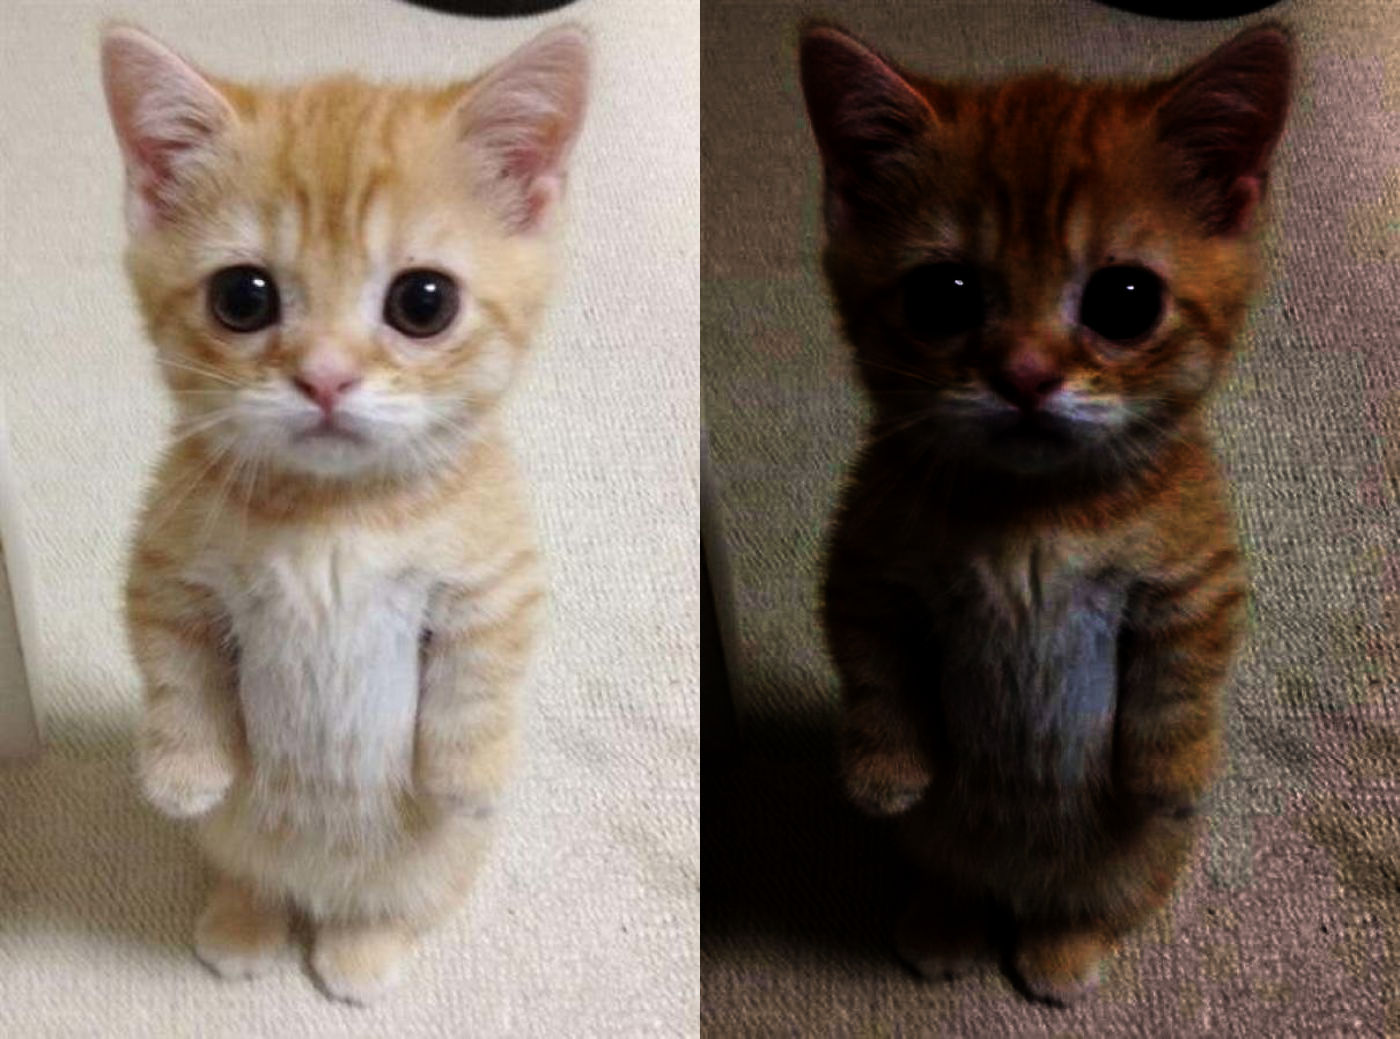

In [165]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
  original = cv.imread('/content/cat.jpg')
  # Menerapkan Gamma Correction
  gamma_corrected = 255 * ((original / 255) ** gamma)
  # Konversi tipe data ke uint8
  gamma_corrected = np.uint8(gamma_corrected)
  final_frame = cv.hconcat((original, gamma_corrected))
  cv2_imshow(final_frame)

except ValueError:
 print('Error, not a number')


##Buat Simulasi Image Depth

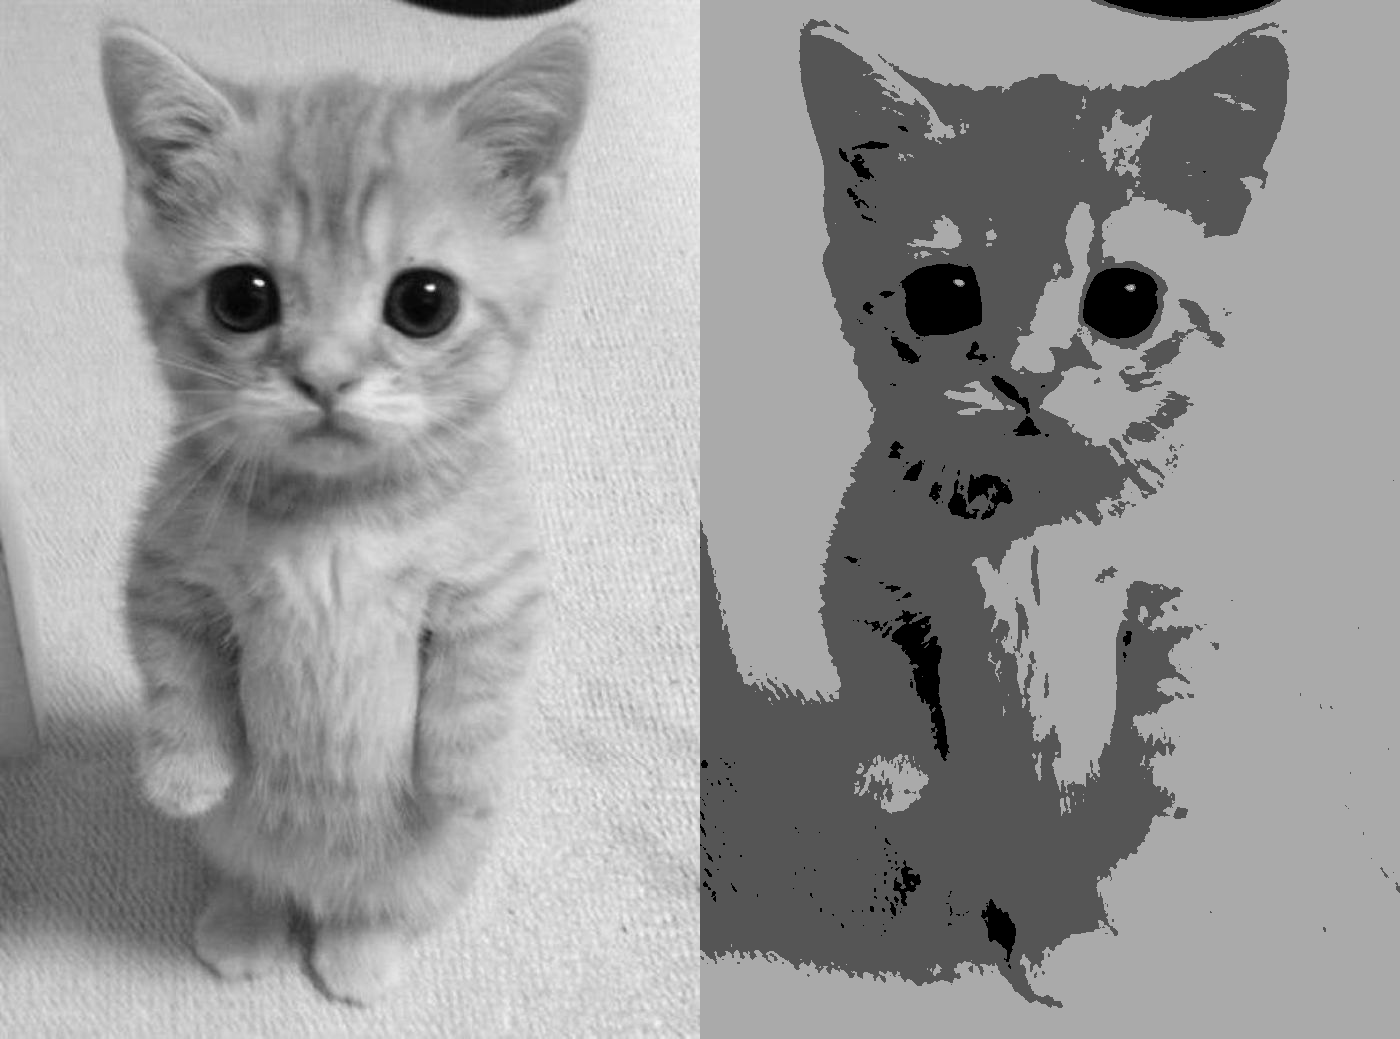

In [59]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)

original = cv.imread('/content/cat.jpg', cv.IMREAD_GRAYSCALE)

depth_image = np.zeros(original.shape, original.dtype)
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i, j] = int(original[i, j] / level) * level

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

##Buat modul Average Denoising


Masukkan jumlah citra yang akan di-average: 100


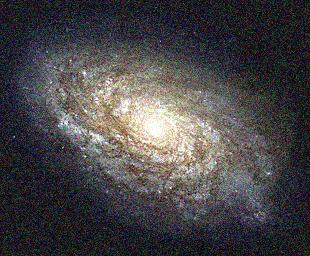

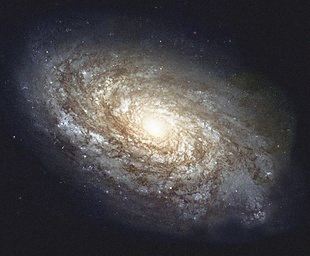

Nilai PSNR (dB): 23.57


In [139]:
import glob
import cv2
import numpy as np

# Fungsi untuk menghitung nilai PSNR
def calculate_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Membaca citra asli
original = cv2.imread('/content/1.jpg')

# Inisialisasi list untuk citra noisy
cv_img = []

# Membaca semua citra dengan Gaussian Noise dalam folder dan subfolder
for img in glob.glob('/content/drive/MyDrive/noises/**/*.jpg', recursive=True):
    n = cv2.imread(img)
    cv_img.append(n)

# Memasukkan jumlah citra yang akan di-average (diinput oleh pengguna)
jumlah_citra_average = int(input("Masukkan jumlah citra yang akan di-average: "))

# Memastikan jumlah citra yang diminta tidak melebihi yang tersedia
jumlah_citra_average = min(jumlah_citra_average, len(cv_img))

# Memilih sejumlah citra yang akan di-average
selected_images = cv_img[:jumlah_citra_average]

# Konversi citra asli dan citra noisy ke tipe data float
original = original.astype(float)
selected_images = [img.astype(float) for img in selected_images]

# Inisialisasi citra hasil denoising dengan citra asli
denoised_image = np.copy(original)

# Menjalankan proses Average Denoising
for img in selected_images:
    denoised_image += img

# Menghitung rata-rata dari citra hasil dan mengonversi kembali ke tipe uint8
denoised_image = (denoised_image / (jumlah_citra_average + 1)).astype(np.uint8)

# Menghitung nilai PSNR
psnr = calculate_psnr(original, denoised_image)

# Menampilkan citra asli dan hasil denoising
cv2_imshow(original)
cv2_imshow(denoised_image)

# Menyimpan citra asli
cv2.imwrite('/content/original_image.jpg', original)

# Menyimpan citra hasil denoising
cv2.imwrite('/content/denoised_image.jpg', denoised_image)


# Menampilkan nilai PSNR
print(f"Nilai PSNR (dB): {psnr:.2f}")


##Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),sedangkan image paling kanan adalah hasilnya:


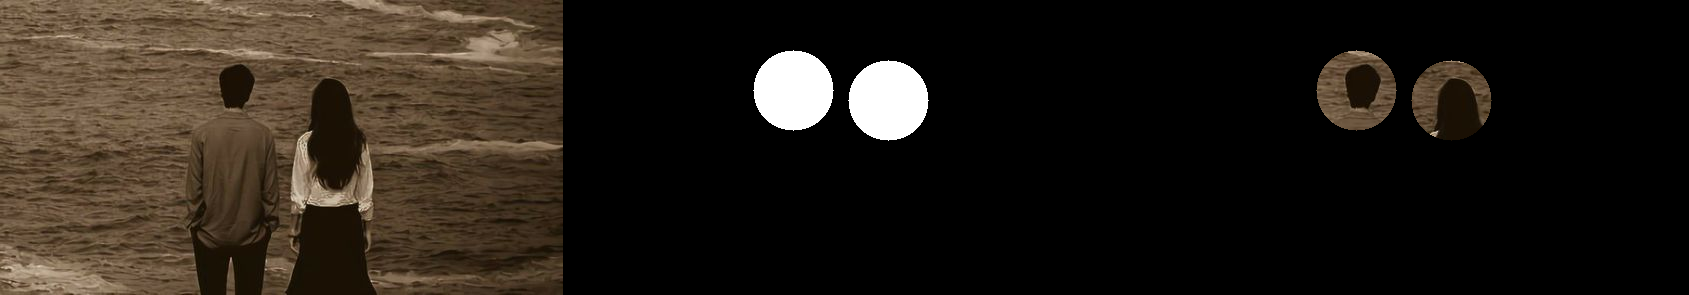

In [158]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('/content/couple.jpg')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (230, 90)  # (x, y) coordinates of the center of the first circle
radius1 = 40

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (325, 100)  # (x, y) coordinates of the center of the second circle
radius2 = 40

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background


# Gambarlah lingkaran kedua pada mask
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background

masked = original_image & mask

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

##Operator OR

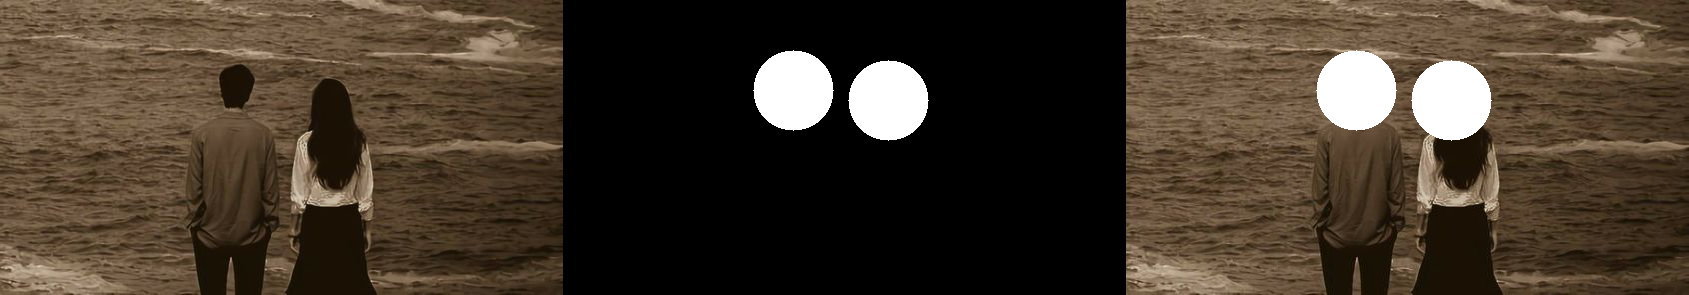

In [159]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('/content/couple.jpg')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (230, 90)  # (x, y) coordinates of the center of the first circle
radius1 = 40

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (325, 100)  # (x, y) coordinates of the center of the second circle
radius2 = 40

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background


# Gambarlah lingkaran kedua pada mask
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background

masked = original_image | mask

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

##Operator NOT

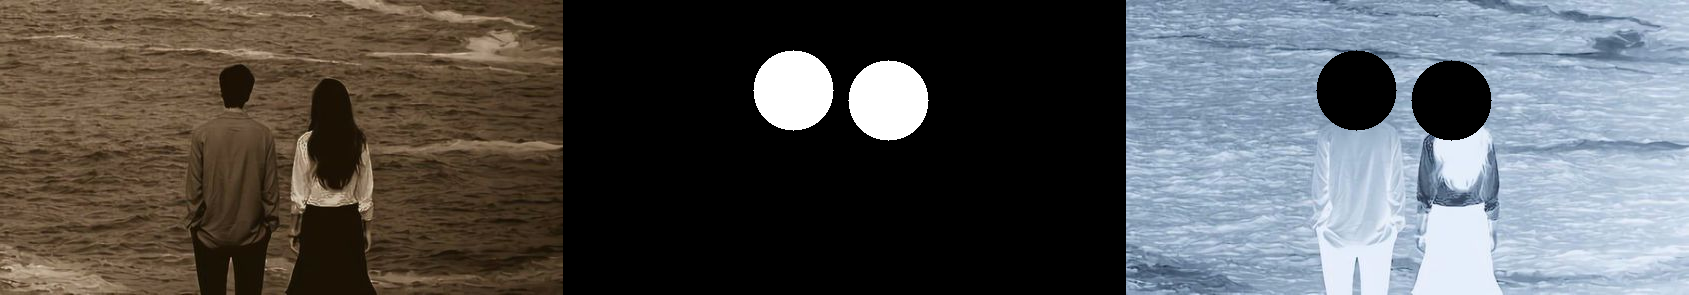

In [163]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('/content/couple.jpg')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (230, 90)  # (x, y) coordinates of the center of the first circle
radius1 = 40

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (325, 100)  # (x, y) coordinates of the center of the second circle
radius2 = 40

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background


# Gambarlah lingkaran kedua pada mask
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background

masked = ~original_image & ~mask

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

##Operator NAND

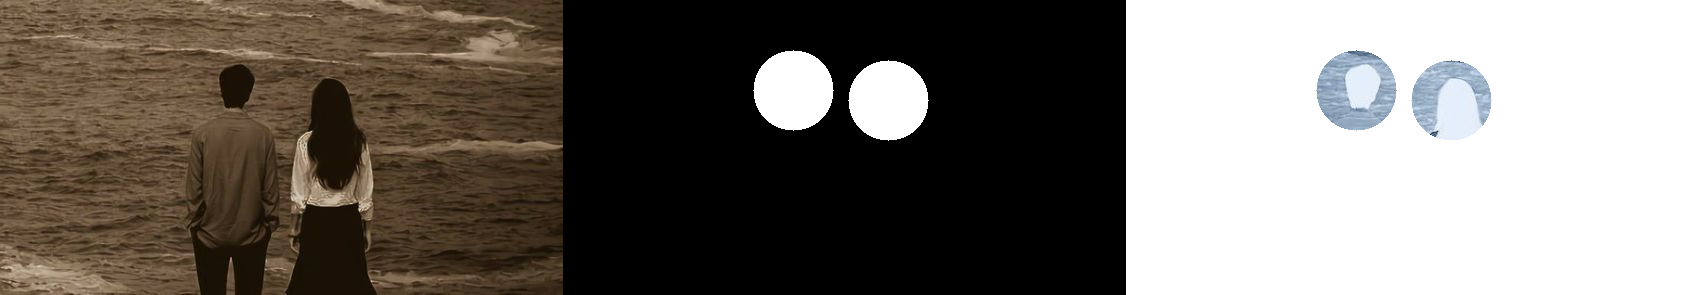

In [162]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('/content/couple.jpg')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (230, 90)  # (x, y) coordinates of the center of the first circle
radius1 = 40

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (325, 100)  # (x, y) coordinates of the center of the second circle
radius2 = 40

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background


# Gambarlah lingkaran kedua pada mask
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background

masked = ~(original_image & mask)

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

##Oerator XOR

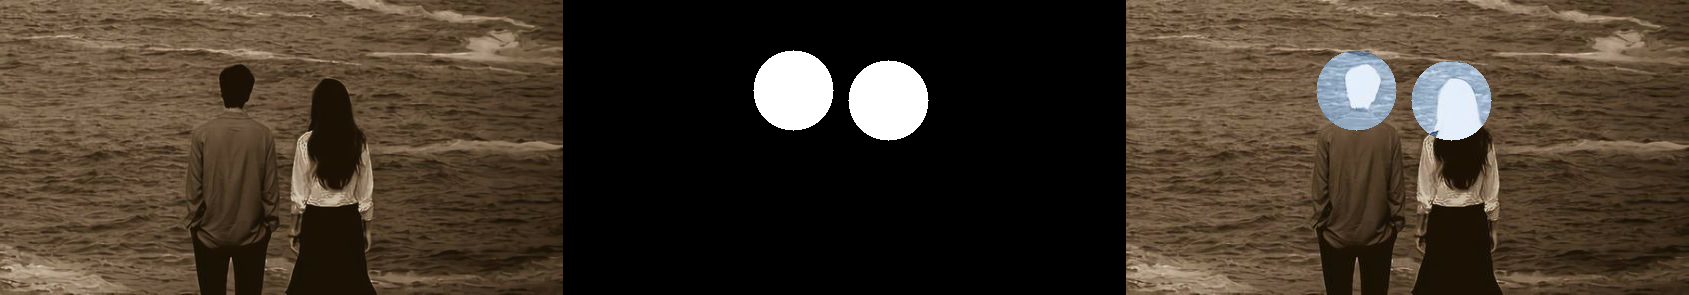

In [164]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('/content/couple.jpg')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (230, 90)  # (x, y) coordinates of the center of the first circle
radius1 = 40

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (325, 100)  # (x, y) coordinates of the center of the second circle
radius2 = 40

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background


# Gambarlah lingkaran kedua pada mask
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background

masked = original_image ^ mask

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)